In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sn

In [3]:
df = pd.read_excel('datatab.xlsx')
df.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [5]:
df.isnull().sum()

,0
Disease,0
Age,0
Gender,0
Smoker status,0


In [4]:
df['Disease'] = df['Disease'].map({'diseased':1,'not diseased':0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Smoker status'] = df['Smoker status'].map({'Smoker':1,'Non-smoker':0})
df.head()

,Disease,Age,Gender,Smoker status
0,1,43,1,1
1,0,18,1,1
2,1,22,0,0
3,1,25,1,0
4,0,45,0,1


In [7]:
feature_cols = ['Age', 'Gender', 'Smoker status']
x = df[feature_cols]
y = df.Disease

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)
display(x_train.shape)
display(y_train.shape)
display( x_test.shape)
display(y_test.shape)

(28, 3)

(28,)

(8, 3)

(8,)

In [9]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [10]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [11]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Confusion matrix : ",  conf_matrix)
print("Accuracy score : ",  Accuracy_score)
print("Accuracy score in percentage : ",  int(Accuracy_score*100),'%')

Confusion matrix :  [[2 0]
 [1 5]]
Accuracy score :  0.875
Accuracy score in percentage :  87 %


<Axes: xlabel='Predicted', ylabel='Actual'>

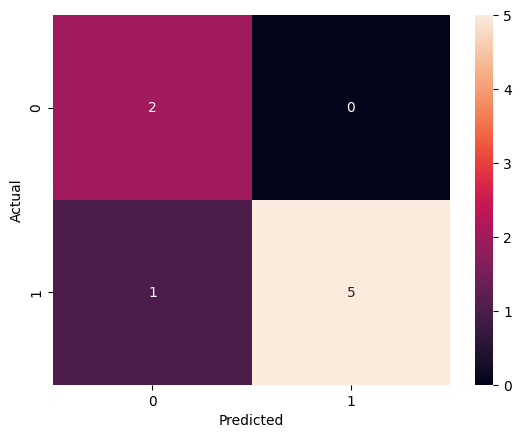

In [12]:
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot = True)